In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mtp

In [2]:
dataset = pd.read_csv("cluster1.csv", header = None)

In [3]:
dataset

,0,1
0,-1.993600,-1.4564
1,0.918930,-1.3925
2,1.446200,-3.1794
3,0.390930,-1.5674
4,2.699200,-5.1001
...,...,...
595,-0.935660,-1.3848
596,2.701200,-3.7438
597,-0.852540,-1.5795
598,0.044536,-1.6157


In [4]:
#Extracting Independent Variables
x = dataset.iloc[:,[0,1]].values

In [ ]:
#finding optimal number of clusters using the elbow method 
from sklearn.cluster import KMeans
wcss_list = []  #for values of WCSS

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
    
mtp.plot(range(1,11),wcss_list)
mtp.title('The Elbow Method Graph')
mtp.xlabel("Number of clusters(k)")
mtp.ylabel("wcss_list")
mtp.show()

In [6]:
#training the K-means model on a dataset
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init='k-means++',random_state = 42)
y_predict = kmeans.fit_predict(x)

In [7]:
y_predict

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,

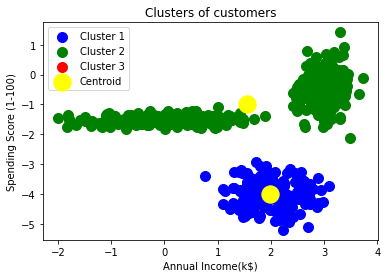

In [14]:
#visualizing the clusters
mtp.scatter(x[y_predict == 0,0], x[y_predict == 0,1], s = 100, c= 'blue', label = 'Cluster 1')
mtp.scatter(x[y_predict == 1,0], x[y_predict == 1,1], s= 100, c = 'green', label = 'Cluster 2')
mtp.scatter(x[y_predict == 2,0], x[y_predict == 2,1], s= 100, c = 'red', label = 'Cluster 3')


mtp.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 300, c = 'yellow' , label = 'Centroid')  
mtp.title('Clusters of customers')
mtp.xlabel('Annual Income(k$)')
mtp.ylabel('Spending Score (1-100)')
mtp.legend()
mtp.show()